<a href="https://colab.research.google.com/github/belyasminesanaeencg-droid/22007684_Sanae_Belyasmine/blob/main/Social_Media_Mental_Health_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sonalshinde123_social_media_mental_health_indicators_dataset_path = kagglehub.dataset_download('sonalshinde123/social-media-mental-health-indicators-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'social-media-mental-health-indicators-dataset' dataset.
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-media-mental-health-indicators-dataset/mental_health_social_media_dataset.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/social-media-mental-health-indicators-dataset/mental_health_social_media_dataset.csv')

In [5]:
df.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [6]:
df.describe()

,age,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,29.947800,373.058200,175.331600,0.864200,1.835400,7.134660,22.693400,2.510400,7.107600,5.625800
std,12.279936,106.003916,71.209329,0.555176,0.943443,0.533184,10.602862,0.794996,1.062378,0.759928
min,13.000000,140.000000,35.000000,0.000000,0.000000,6.400000,8.000000,1.000000,5.000000,4.000000
25%,21.000000,310.000000,118.000000,1.000000,1.000000,6.700000,14.000000,2.000000,6.000000,5.000000
50%,27.000000,388.000000,170.000000,1.000000,2.000000,7.100000,21.000000,3.000000,7.000000,6.000000
75%,35.250000,461.000000,231.000000,1.000000,2.000000,7.450000,29.000000,3.000000,8.000000,6.000000
max,69.000000,520.000000,338.000000,2.000000,4.000000,8.300000,46.000000,4.000000,9.000000,7.000000


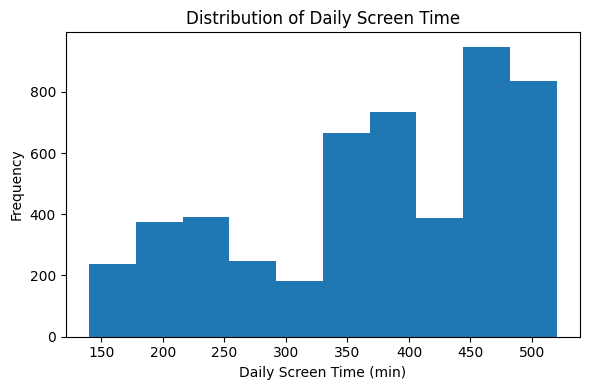

In [7]:
plt.figure(figsize=(6,4))
plt.hist(df['daily_screen_time_min'].dropna())
plt.xlabel('Daily Screen Time (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Screen Time')
plt.tight_layout()
plt.show()

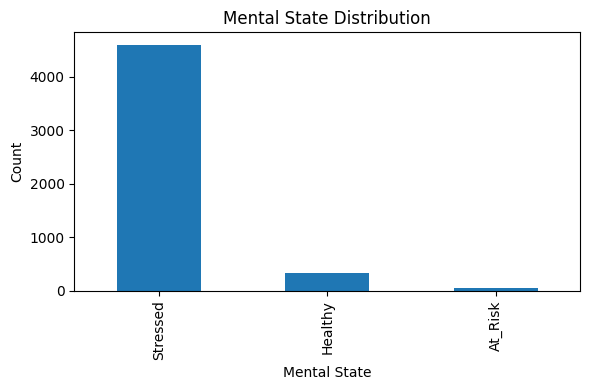

In [8]:
plt.figure(figsize=(6,4))
df['mental_state'].value_counts().plot(kind='bar')
plt.xlabel('Mental State')
plt.ylabel('Count')
plt.title('Mental State Distribution')
plt.tight_layout()
plt.show()

In [9]:
df_clean = df.copy()
df_clean = df_clean.drop(['person_name', 'date'], axis=1)

In [10]:
le_gender = LabelEncoder()
df_clean['gender'] = le_gender.fit_transform(df_clean['gender'])

In [11]:
le_platform = LabelEncoder()
df_clean['platform'] = le_platform.fit_transform(df_clean['platform'])

In [12]:
le_target = LabelEncoder()
df_clean['mental_state'] = le_target.fit_transform(df_clean['mental_state'])

In [13]:
X = df_clean.drop('mental_state', axis=1)
y = df_clean['mental_state']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [17]:
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


In [19]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [20]:
importances = model.feature_importances_
feature_names = X.columns

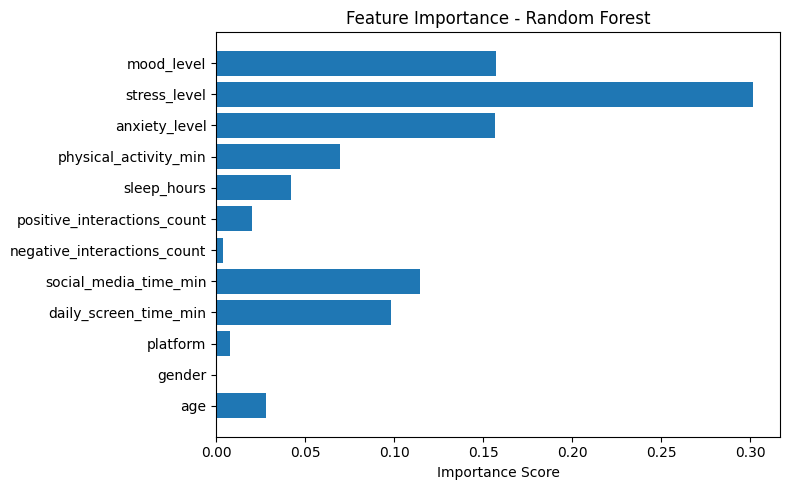

In [21]:
plt.figure(figsize=(8,5))
plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


In [24]:
df.to_csv("mon_dataset.csv", index=False)


In [25]:
from google.colab import files
files.download("mon_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# === 1. Importation des bibliothèques ===
print("1. Bibliothèques importées avec succès.\n")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# === 2. Chargement de vos données ===
path = "/content/mon_dataset.csv"   # ton fichier
df = pd.read_csv(path)

print("2. Données chargées. Taille du dataset :", df.shape)
print("   Colonnes :", list(df.columns), "\n")

# === 3. Introduction artificielle de NaN ===
print("3. Introduction artificielle de valeurs manquantes (NaN)...")

df_nan = df.copy()
nan_mask = np.random.rand(*df_nan.shape) < 0.05    # 5% de valeurs manquantes
df_nan = df_nan.mask(nan_mask)

print("   Nombre total de NaN générés :", df_nan.isna().sum().sum(), "\n")

# === 4. Nettoyage & Imputation ===
print("4. Nettoyage des données...")

# Séparer colonnes numériques vs catégorielles
numeric_cols = df_nan.select_dtypes(include=np.number).columns
categorical_cols = df_nan.select_dtypes(exclude=np.number).columns

# Imputer les valeurs manquantes
imputer_num = SimpleImputer(strategy="mean")
imputer_cat = SimpleImputer(strategy="most_frequent")

df_nan[numeric_cols] = imputer_num.fit_transform(df_nan[numeric_cols])
df_nan[categorical_cols] = imputer_cat.fit_transform(df_nan[categorical_cols])

print("   Imputation terminée.")
print("   Valeurs manquantes restantes :", df_nan.isna().sum().sum(), "\n")

# Encoder les colonnes catégorielles
print("   Encodage des variables catégorielles...")

encoder = LabelEncoder()
for col in categorical_cols:
    df_nan[col] = encoder.fit_transform(df_nan[col])

df_clean = df_nan.copy()

print("   Encodage terminé.\n")

# === 5. Analyse exploratoire ===
print("5. Analyse exploratoire (EDA)...")
print("   Statistiques descriptives (5 premières colonnes) :")
print(df_clean.describe().iloc[:, :5], "\n")

# === 6. Split des données ===
print("6. Séparation effectuée :")

target_column = "mental_state"

X = df_clean.drop(target_column, axis=1)
y = df_clean[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("   Entraînement :", len(X_train), "échantillons")
print("   Test :", len(X_test), "échantillons\n")

# === 7. Entraînement modèle ===
print("7. Entraînement du modèle (Random Forest Classifier)...")

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

print("   Modèle entraîné avec succès.\n")

# === 8. Évaluation ===
print("8. Évaluation des performances...")

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100

print(f"   >>> Accuracy Score : {acc:.2f}%\n")
print("   >>> Rapport de Classification :")
print(classification_report(y_test, y_pred), "\n")

# === FIN ===
print("--- FIN DU SCRIPT ---")


1. Bibliothèques importées avec succès.

2. Données chargées. Taille du dataset : (5000, 15)
   Colonnes : ['person_name', 'age', 'date', 'gender', 'platform', 'daily_screen_time_min', 'social_media_time_min', 'negative_interactions_count', 'positive_interactions_count', 'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level', 'mood_level', 'mental_state'] 

3. Introduction artificielle de valeurs manquantes (NaN)...
   Nombre total de NaN générés : 3773 

4. Nettoyage des données...
   Imputation terminée.
   Valeurs manquantes restantes : 0 

   Encodage des variables catégorielles...
   Encodage terminé.

5. Analyse exploratoire (EDA)...
   Statistiques descriptives (5 premières colonnes) :
       person_name          age         date       gender     platform
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean    437.071800    29.968921   328.095200     0.496800     2.824000
std     255.126389    12.013357   201.450942     0.535954     2.0672

/tmp/ipython-input-75318507.py:8: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(


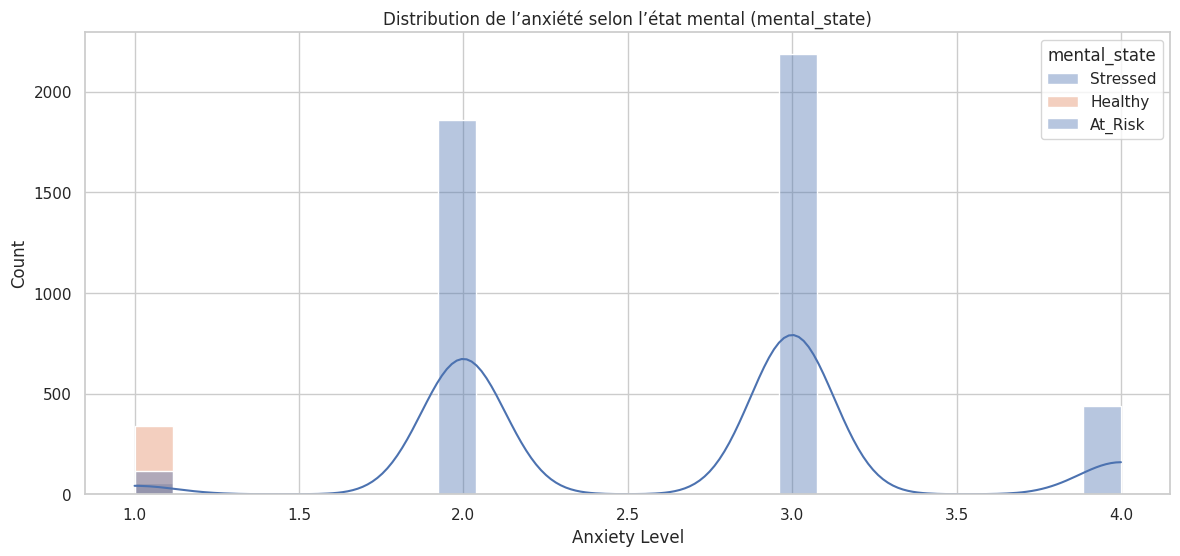

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(14,6))

sns.histplot(
    data=df,
    x="anxiety_level",
    hue="mental_state",
    kde=True,
    stat="count",
    common_norm=False,
    alpha=0.4,
    palette=["#4C72B0", "#E18860"]
)

plt.xlabel("Anxiety Level")
plt.ylabel("Count")
plt.title("Distribution de l’anxiété selon l’état mental (mental_state)")
plt.show()


Aperçu des données :


,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


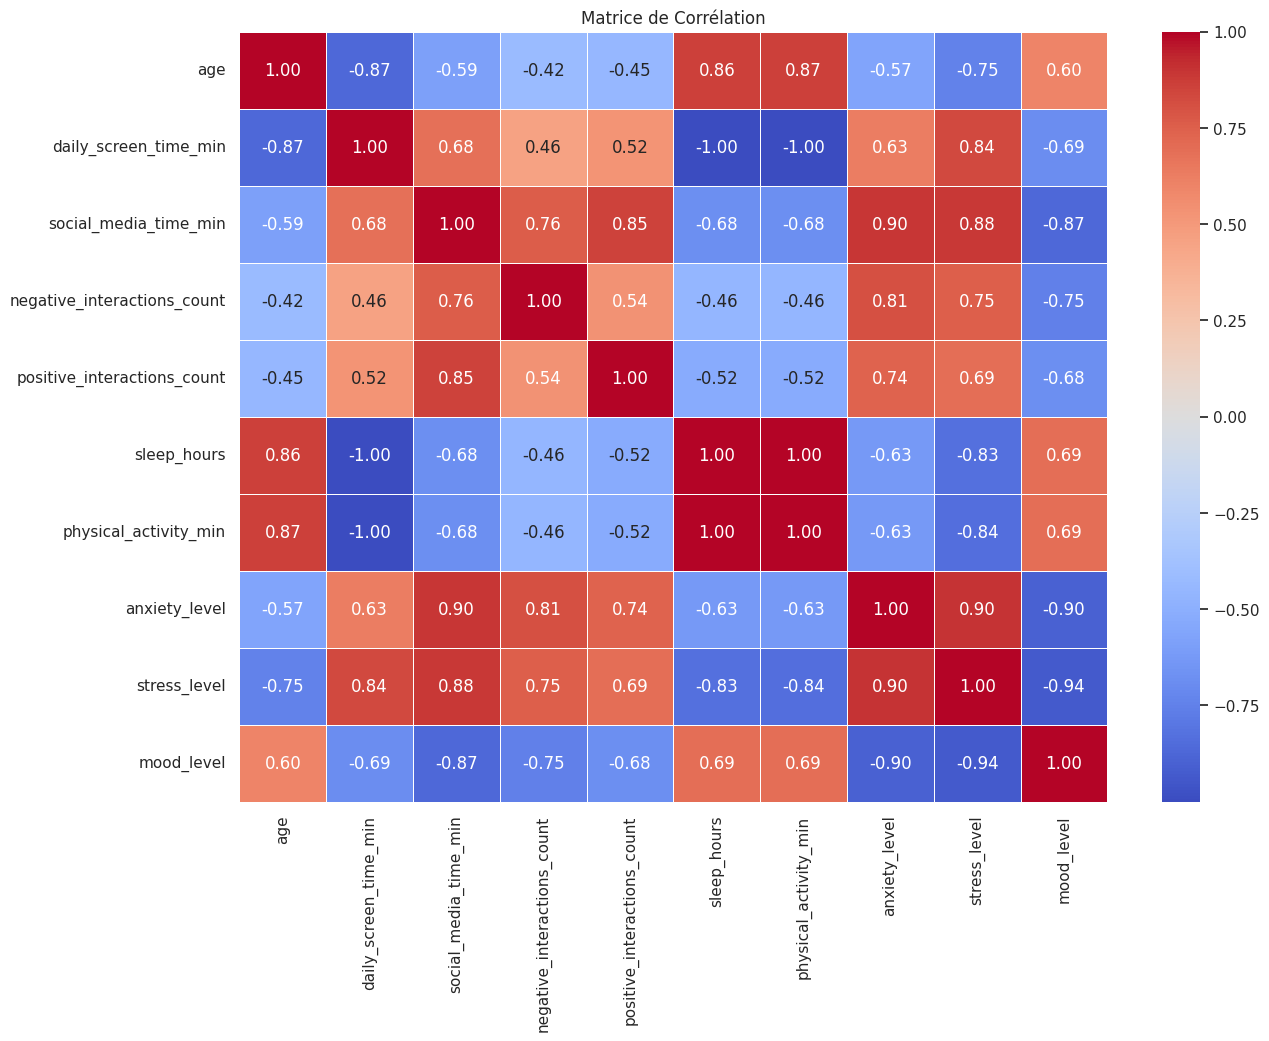

In [33]:
# --- IMPORTATIONS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optionnel : joli style
sns.set_theme(style="whitegrid")

# --- CHARGER LE FICHIER ---
# Si tu as uploadé le fichier dans Colab :
# Clique à gauche sur "Files" -> Upload -> sélectionne mon_dataset.csv
df = pd.read_csv("/content/mon_dataset.csv")

# Vérification rapide
print("Aperçu des données :")
display(df.head())

# --- MATRICE DE CORRÉLATION ---
plt.figure(figsize=(14, 10))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,              # afficher les valeurs
    fmt=".2f",               # format des chiffres
    cmap="coolwarm",         # palette de couleurs
    linewidths=0.5
)

plt.title("Matrice de Corrélation")
plt.show()


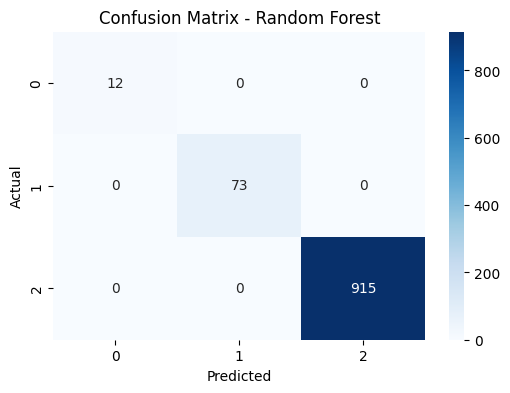

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()